In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#Paramters
r          = 0.5  #L2 regularization
alpha      = 0.01 #learning rate
batch_size = 100  #number of samples per stocastic update
max_its    = 2500 #overall iterations
 
 

In [3]:
##################Functions###############################################

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def predict(x,W1,W1_0,W2,W2_0):
    H1 = np.maximum(0, np.add( np.matmul( np.transpose(W1),x),  W1_0))
    H2 = np.maximum(0, np.add( np.matmul( np.transpose(W2),H1),  W2_0))
    return softmax(H2)

def ReluGrad(x):
    x[x<=0] = 0
    x[x>0]  = 1
    return x

def TestOut(W1,W1_0,W2,W2_0,x_test,y_test):
    Correct = 0;
    for i in range(len(x_test)-1):
        #Run predction
        yout = predict(x_test[i,:],W1,W1_0,W2,W2_0,)
        #Check Results1
        if np.argmax(yout) ==y_test[i]:
            Correct =  Correct+1
    #Output
    OverallAccuracy = 100*Correct/len(x_test)
    return OverallAccuracy



In [4]:
#Load data
from tensorflow.keras.datasets import mnist
(x_train_im, y_train), (x_test_im, y_test) = mnist.load_data()
x_train = x_train_im.astype('float32') / 255.
x_test  = x_test_im.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    

In [5]:
#Random Initial values
W1val   = np.random.normal(size=(784,32), scale = .1)
W2val   = np.random.normal(size=(32, 10), scale = .1)
W1_0val = np.random.normal(size=(32),     scale = .1)
W2_0val = np.random.normal(size=(10),     scale = .1)

In [6]:
#Useful Variables
Lsofar   = 10
Loss     = np.zeros(max_its)
Accuracy = np.zeros(max_its)
insample  = np.zeros(int(max_its/100))
outsample = np.zeros(int(max_its/100))
count     = 0 

In [7]:
#Training loop
for i in range(max_its):#total number of updates
    #reset grads and loss
    BatchLoss = 0
    BatchCorrect = 0
    gradW1   = np.zeros(W1val.shape)
    gradW2   = np.zeros(W2val.shape)
    gradW1_0 = np.zeros(W1_0val.shape)
    gradW2_0 = np.zeros(W2_0val.shape)

    #inner iteration-batch
    for j in range(batch_size):
        #Load image and label
        Idx    = np.random.randint(1,60000)
        x_val  = x_train[Idx,:]
        y_true = np.zeros([10])
        y_true[y_train[Idx]] = 1.0
        
        #Forward pass-> predict(xval,W1val,W1_0val,W2val,W2_0val)
        H1val = np.maximum(0, np.add( np.matmul( np.transpose(W1val),x_val), W1_0val))
        H2val = np.maximum(0, np.add( np.matmul( np.transpose(W2val),H1val), W2_0val))
        y_out = softmax(H2val)
        L     = -np.matmul(np.transpose(y_true), np.log(y_out)) 

        #update loss
        BatchLoss = BatchLoss + (1/batch_size)*L
        if np.argmax(y_out) == np.argmax(y_true):
            BatchCorrect = BatchCorrect+1

        #BackProp
        D3 = y_out - y_true
        gradW2 = gradW2 + np.matmul(np.expand_dims(H1val,1),np.transpose(np.expand_dims(D3,1)))
        gradW2_0 = gradW2_0 + D3

        D2 = np.multiply(np.matmul(W2val,D3),ReluGrad(H1val))
        gradW1 = gradW1 + np.matmul(np.expand_dims(x_val,1),np.transpose(np.expand_dims(D2,1)))
        gradW1_0 = gradW1_0 + D2
        

    #Update weights
    W1val   = np.add(W1val, -(alpha/batch_size)*(np.add(gradW1, r*W1val)))
    W2val   = np.add(W2val, -(alpha/batch_size)*(np.add(gradW2, r*W2val)))
    W1_0val = np.add(W1_0val, -(alpha/batch_size)*(np.add(gradW1_0, r*W1_0val)))
    W2_0val = np.add(W2_0val, -(alpha/batch_size)*(np.add(gradW2_0, r*W2_0val)))
    Loss[i] = BatchLoss 
    Accuracy[i] = 100*BatchCorrect/batch_size
    
    #Print
    if i%100 == 0:
        print("Batch = %d, Loss: %f, Accuracy: %f" %(i+1,Loss[i],BatchCorrect/batch_size))
    if i%100 == 1:
        insample[count]  = 100-Accuracy[i]
        outsample[count] = 100-TestOut(W1val,W1_0val,W2val,W2_0val,x_train, y_train)
        count = count+1

Batch = 1, Loss: 2.325025, Accuracy: 0.110000
Batch = 101, Loss: 2.206517, Accuracy: 0.230000
Batch = 201, Loss: 1.935601, Accuracy: 0.540000
Batch = 301, Loss: 1.467317, Accuracy: 0.760000
Batch = 401, Loss: 1.205554, Accuracy: 0.720000
Batch = 501, Loss: 1.053919, Accuracy: 0.770000
Batch = 601, Loss: 0.941468, Accuracy: 0.750000
Batch = 701, Loss: 0.741900, Accuracy: 0.830000
Batch = 801, Loss: 0.704865, Accuracy: 0.820000
Batch = 901, Loss: 0.554950, Accuracy: 0.830000
Batch = 1001, Loss: 0.634690, Accuracy: 0.830000
Batch = 1101, Loss: 0.508779, Accuracy: 0.890000
Batch = 1201, Loss: 0.486674, Accuracy: 0.870000
Batch = 1301, Loss: 0.620942, Accuracy: 0.860000
Batch = 1401, Loss: 0.507388, Accuracy: 0.860000
Batch = 1501, Loss: 0.531065, Accuracy: 0.860000
Batch = 1601, Loss: 0.429843, Accuracy: 0.890000
Batch = 1701, Loss: 0.417517, Accuracy: 0.880000
Batch = 1801, Loss: 0.356673, Accuracy: 0.890000
Batch = 1901, Loss: 0.498740, Accuracy: 0.860000
Batch = 2001, Loss: 0.427608, Ac

<Figure size 432x288 with 0 Axes>

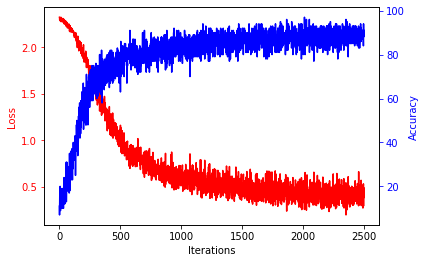

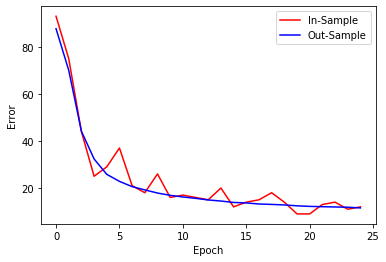

In [8]:
###### Visualize Training
its = np.arange(max_its)
plt.figure(0)
fig0,ax1 = plt.subplots()
ax1.plot(its,Loss,'r-', label ="Loss")
ax1.set_ylabel('Loss', color='r')
ax1.tick_params('y', colors='r')
ax1.set_xlabel('Iterations')
ax2 = ax1.twinx()
ax2.plot(Accuracy,'b-',label="Batch Accuracy")
ax2.set_ylabel("Accuracy", color='b')
ax2.tick_params('y', colors='b')
 
plt.figure(1)
fig1,ax3 = plt.subplots()
ax3.plot(insample,'r-', label = "In-Sample")
ax3.plot(outsample,'b-',label = "Out-Sample")
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Error')
ax3.legend()


1


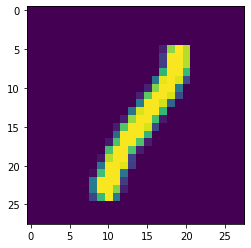

In [12]:
idx = np.random.randint(10000)
yout = predict(x_test[idx,:],W1val,W1_0val,W2val,W2_0val)
print(np.argmax(yout))
plt.imshow(x_test_im[idx])